# WeatherPy
----

#### Observable trends
* Temperature rises as it approaches the equator. Three charts below support this conclusions: the Latitude vs. Temperature charts, and the Northern and Southern Hemisphere Temperature charts. We can clearly see temperature rising up as it approaches latitude 0 (equator) and actually peak a little bit past that around latitude 10-20, then drop as we go past the equator again.
* There are no correlation between latitude and cloudiness. We broke down this data between the Northern and Southern Hemispheres, ran a regression for both, and found no significant correlation. Visually, we can also observe from the main graph that the datasets are well-spread out.
* Windspeed is another element that does not seem to be affected by distance from the equator, or vice versa. The regression analysis we ran in both Hemispheres who near zero correlation. The graph that combined both Hemispheres "Latitude vs. Wind Speed

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set starting URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID={weather_api_key}&q="

# Create empty cells to populate into DataFrame
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Set initial count for records and sets
records = 0
sets = 1

# Loop through each cities and populate info into respective lists
for city in cities:
    response = requests.get(url + city).json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        if records > 48:
            records = 1
            sets += 1
            city_name.append(city)
        else:
            records += 1
            city_name.append(city)
        print(f"Processing Record {records} or Set {sets} | {city}")
    except:
        print(f"City not found. Skipping...")
print('''------------------------------
Data Retrieval Complete
------------------------------''')

Processing Record 1 or Set 1 | east london
Processing Record 2 or Set 1 | hithadhoo
Processing Record 3 or Set 1 | ushuaia
City not found. Skipping...
Processing Record 4 or Set 1 | prince rupert
Processing Record 5 or Set 1 | ayacucho
Processing Record 6 or Set 1 | tuktoyaktuk
Processing Record 7 or Set 1 | beringovskiy
Processing Record 8 or Set 1 | kapaa
Processing Record 9 or Set 1 | mataura
Processing Record 10 or Set 1 | lorengau
Processing Record 11 or Set 1 | tarauaca
Processing Record 12 or Set 1 | qaanaaq
Processing Record 13 or Set 1 | airai
Processing Record 14 or Set 1 | thompson
Processing Record 15 or Set 1 | bluff
Processing Record 16 or Set 1 | kayes
Processing Record 17 or Set 1 | hermanus
Processing Record 18 or Set 1 | meulaboh
City not found. Skipping...
Processing Record 19 or Set 1 | khatanga
Processing Record 20 or Set 1 | pingliang
Processing Record 21 or Set 1 | shambu
City not found. Skipping...
Processing Record 22 or Set 1 | te anau
Processing Record 23 or 

Processing Record 44 or Set 4 | jining
Processing Record 45 or Set 4 | koutsouras
Processing Record 46 or Set 4 | millerovo
Processing Record 47 or Set 4 | lompoc
Processing Record 48 or Set 4 | ryotsu
Processing Record 49 or Set 4 | staryy nadym
Processing Record 1 or Set 5 | grindavik
Processing Record 2 or Set 5 | jardim
Processing Record 3 or Set 5 | hakui
Processing Record 4 or Set 5 | longonjo
Processing Record 5 or Set 5 | pital
Processing Record 6 or Set 5 | pontivy
Processing Record 7 or Set 5 | marienburg
Processing Record 8 or Set 5 | karratha
Processing Record 9 or Set 5 | tautira
Processing Record 10 or Set 5 | batemans bay
Processing Record 11 or Set 5 | broken hill
Processing Record 12 or Set 5 | binzhou
Processing Record 13 or Set 5 | usevya
Processing Record 14 or Set 5 | marystown
Processing Record 15 or Set 5 | nagod
Processing Record 16 or Set 5 | porto novo
Processing Record 17 or Set 5 | alofi
Processing Record 18 or Set 5 | yanam
City not found. Skipping...
Proce

Processing Record 36 or Set 8 | hofn
Processing Record 37 or Set 8 | qujing
Processing Record 38 or Set 8 | yeppoon
Processing Record 39 or Set 8 | yar-sale
Processing Record 40 or Set 8 | kruisfontein
Processing Record 41 or Set 8 | general pico
Processing Record 42 or Set 8 | angoram
Processing Record 43 or Set 8 | mersin
City not found. Skipping...
Processing Record 44 or Set 8 | turukhansk
Processing Record 45 or Set 8 | roald
Processing Record 46 or Set 8 | grand gaube
Processing Record 47 or Set 8 | shubarkuduk
Processing Record 48 or Set 8 | krasnokamensk
Processing Record 49 or Set 8 | bakal
Processing Record 1 or Set 9 | iralaya
Processing Record 2 or Set 9 | sena madureira
Processing Record 3 or Set 9 | douglas
Processing Record 4 or Set 9 | veselynove
Processing Record 5 or Set 9 | beni suef
Processing Record 6 or Set 9 | tessalit
Processing Record 7 or Set 9 | talas
Processing Record 8 or Set 9 | reutlingen
City not found. Skipping...
City not found. Skipping...
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create DataFrame from lists above
df = pd.DataFrame({"City": city_name, 
                   "Lat": lat, 
                   "Lng": lng, 
                   "Max Temp": max_temp,
                   "Humidity": humidity, 
                   "Cloudiness": cloudiness, 
                   "Wind Speed": wind_speed, 
                   "Country": country, 
                   "Date": date})
df.to_csv(output_data_file, index = False)
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east london,-33.0153,27.9116,55.40,100,40,6.91,ZA,1620971686
1,hithadhoo,-0.6000,73.0833,82.02,77,89,8.79,MV,1620971686
2,ushuaia,-54.8000,-68.3000,39.20,87,0,5.50,AR,1620971686
3,prince rupert,54.3161,-130.3201,46.40,76,90,4.61,CA,1620971687
4,ayacucho,-13.1583,-74.2239,50.67,88,27,0.74,PE,1620971687


In [5]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,561.00000,561.000000,561.000000,561.000000,561.000000,561.000000,5.610000e+02
mean,22.23772,20.435873,64.377683,66.992870,50.431373,7.746613,1.620972e+09
std,32.79643,87.778604,18.142312,23.314387,39.061344,4.932742,8.353566e+01
min,-54.80000,-179.166700,17.600000,1.000000,0.000000,0.250000,1.620971e+09
25%,-4.06250,-57.557500,50.670000,55.000000,5.000000,3.910000,1.620972e+09
50%,27.97690,26.300000,66.200000,71.000000,58.000000,6.910000,1.620972e+09
75%,49.18330,95.321400,79.000000,87.000000,90.000000,10.560000,1.620972e+09
max,78.21860,179.316700,104.000000,100.000000,100.000000,32.970000,1.620972e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

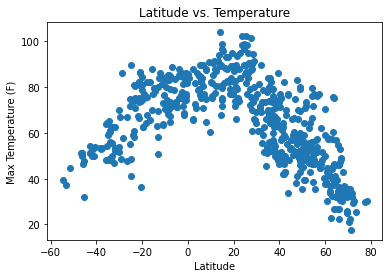

In [8]:
# Define axis
xaxis = df["Lat"]
yaxis = df["Max Temp"]

# Graph
fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.set(title="Latitude vs. Temperature",
       xlabel="Latitude",
       ylabel="Max Temperature (F)");
fig.savefig("../output_data/Fig1.png")

There seems to be a strong correlation between latitude and max temperature. Moving up from the Southern Hemisphere, we have a positive correlation up to about 20 latitude, and then a negative correlation as we move further North.

## Latitude vs. Humidity Plot

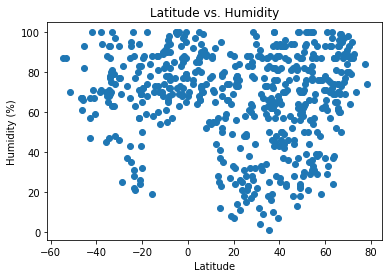

In [9]:
# Define axis
xaxis = df["Lat"]
yaxis = df["Humidity"]

# Graph
fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.set(title="Latitude vs. Humidity",
       xlabel="Latitude",
       ylabel="Humidity (%)");
fig.savefig("../output_data/Fig2.png")

There's no obvious correlation here between latitude and humidity. Higher latitude does show a wider range of humidity which is interesting to note.

## Latitude vs. Cloudiness Plot

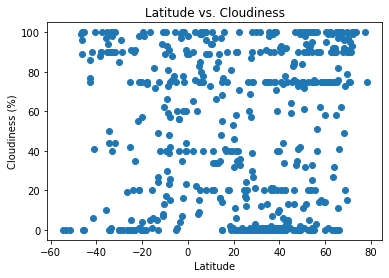

In [10]:
# Define axis
xaxis = df["Lat"]
yaxis = df["Cloudiness"]

# Graph
fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.set(title="Latitude vs. Cloudiness",
       xlabel="Latitude",
       ylabel="Cloudiness (%)");
fig.savefig("../output_data/Fig3.png")

Latitude vs. cloudiness is another area where there seems to be no strong correlation. It is interesting to see, however, that in all latitudes, there are strong clusters of data for extreme cloudiness (either 100% or 0%) resulting in almost a solid line on the top and bottom of this graph.

## Latitude vs. Wind Speed Plot

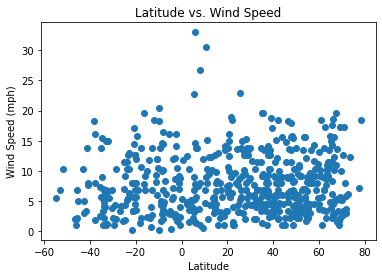

In [11]:
# Define axis
xaxis = df["Lat"]
yaxis = df["Wind Speed"]

# Graph
fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.set(title="Latitude vs. Wind Speed",
       xlabel="Latitude",
       ylabel="Wind Speed (mph)");
fig.savefig("../output_data/Fig4.png")

There appears to be a correlation of almost 0 in terms of latitude and wind speed. It seems that across all latitudes, wind speed is almost always below 15 mph. Only in rare instances does it rise above 15 mph.

## Linear Regression

In [12]:
# Split up Northern and Southern Hemispheres
df_n = df.loc[df["Lat"] >= 0, :]
df_s = df.loc[df["Lat"] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8024177761719974


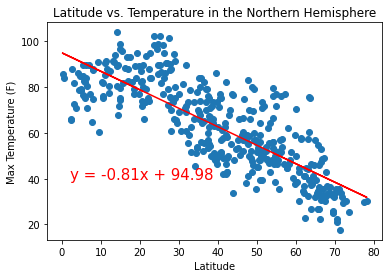

In [13]:
# Define axis
xaxis = df_n["Lat"]
yaxis = df_n["Max Temp"]

# Plot out the graph with the regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.plot(xaxis, regress_values,"r-")
ax.annotate(line_eq, (2,40), color="red", fontsize="15")
ax.set(title="Latitude vs. Temperature in the Northern Hemisphere",
       xlabel="Latitude",
       ylabel="Max Temperature (F)");
fig.savefig("../output_data/Fig5.png")
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7495272089487409


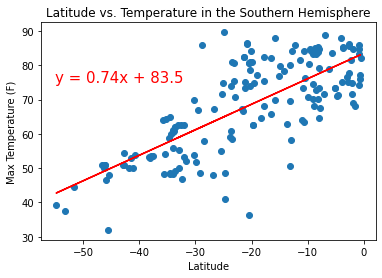

In [14]:
# Define axis
xaxis = df_s["Lat"]
yaxis = df_s["Max Temp"]

# Plot out the graph with the regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.plot(xaxis, regress_values,"r-")
ax.annotate(line_eq, (-55,75), color="red", fontsize="15")
ax.set(title="Latitude vs. Temperature in the Southern Hemisphere",
       xlabel="Latitude",
       ylabel="Max Temperature (F)");
fig.savefig("../output_data/Fig6.png")
print(f"The r-value is: {rvalue}")

This pair of plots are probably the most obvious answer to the question posed in README file: "What's the weather like as we approach the equator?" We can clearly see here that temperature rises as it approaches the quator (latitude 0) and falls as it moves away from it.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.12839414862303075


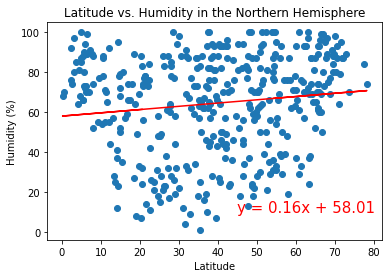

In [15]:
# Define axis
xaxis = df_n["Lat"]
yaxis = df_n["Humidity"]

# Plot out the graph with the regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.plot(xaxis, regress_values,"r-")
ax.annotate(line_eq, (45,10), color="red", fontsize="15")
ax.set(title="Latitude vs. Humidity in the Northern Hemisphere",
       xlabel="Latitude",
       ylabel="Humidity (%)");
fig.savefig("../output_data/Fig7.png")
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.17069655397170064


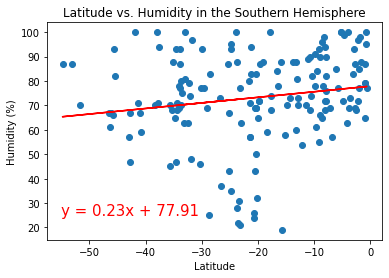

In [16]:
# Define axis
xaxis = df_s["Lat"]
yaxis = df_s["Humidity"]

# Plot out the graph with the regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.plot(xaxis, regress_values,"r-")
ax.annotate(line_eq, (-55,25), color="red", fontsize="15")
ax.set(title="Latitude vs. Humidity in the Southern Hemisphere",
       xlabel="Latitude",
       ylabel="Humidity (%)");
fig.savefig("../output_data/Fig8.png")
print(f"The r-value is: {rvalue}")

Northern Hemisphere data offers little insight as the data are spread out very evenly. Southern Hemisphere data, however, reveals a slightly stronger (positive) relationship between latitude and humidity: as we move north towards the equator, humidity rises.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.17081112961127257


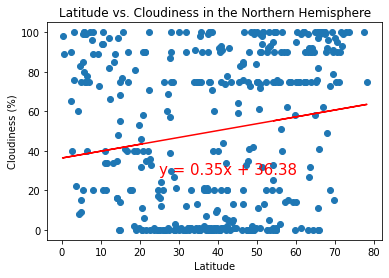

In [17]:
# Define axis
xaxis = df_n["Lat"]
yaxis = df_n["Cloudiness"]

# Plot out the graph with the regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.plot(xaxis, regress_values,"r-")
ax.annotate(line_eq, (25,28), color="red", fontsize="15")
ax.set(title="Latitude vs. Cloudiness in the Northern Hemisphere",
       xlabel="Latitude",
       ylabel="Cloudiness (%)");
fig.savefig("../output_data/Fig9.png")
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.004929790933564558


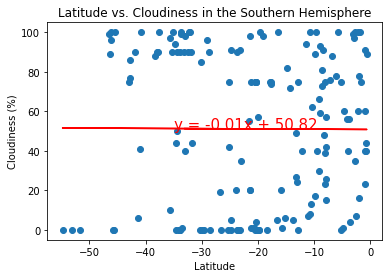

In [18]:
# Define axis
xaxis = df_s["Lat"]
yaxis = df_s["Cloudiness"]

# Plot out the graph with the regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.plot(xaxis, regress_values,"r-")
ax.annotate(line_eq, (-35,51), color="red", fontsize="15")
ax.set(title="Latitude vs. Cloudiness in the Southern Hemisphere",
       xlabel="Latitude",
       ylabel="Cloudiness (%)");
fig.savefig("../output_data/Fig10.png")
print(f"The r-value is: {rvalue}")

The clusters of extreme cloudiness are more present in the Northern Hemisphere dataset. The Southern Hemisphere dataset reveals a weak positive relationship where cloudiness rises as we approach the equator.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.01059487321855932


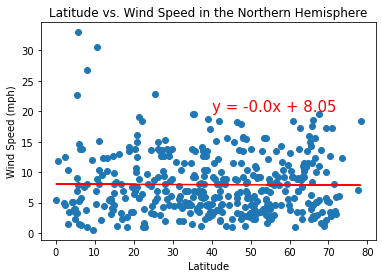

In [19]:
# Define axis
xaxis = df_n["Lat"]
yaxis = df_n["Wind Speed"]

# Plot out the graph with the regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.plot(xaxis, regress_values,"r-")
ax.annotate(line_eq, (40,20), color="red", fontsize="15")
ax.set(title="Latitude vs. Wind Speed in the Northern Hemisphere",
       xlabel="Latitude",
       ylabel="Wind Speed (mph)");
fig.savefig("../output_data/Fig11.png")
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.07554225042745907


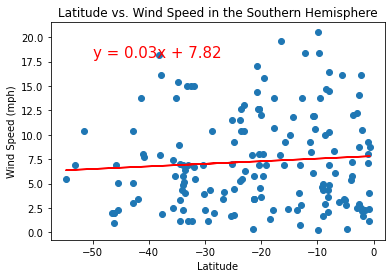

In [20]:
# Define axis
xaxis = df_s["Lat"]
yaxis = df_s["Wind Speed"]

# Plot out the graph with the regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig, ax = plt.subplots()
ax.scatter(xaxis, yaxis);
ax.plot(xaxis, regress_values,"r-")
ax.annotate(line_eq, (-50,18), color="red", fontsize="15")
ax.set(title="Latitude vs. Wind Speed in the Southern Hemisphere",
       xlabel="Latitude",
       ylabel="Wind Speed (mph)");
fig.savefig("../output_data/Fig12.png")
print(f"The r-value is: {rvalue}")

Both datasets in this pair reveal the same near-zero relationship between wind speed and latitude. The flat slope shows that wind speed is not affected much by distance from the equator.